<a href="https://colab.research.google.com/github/leifblake/cgt370miniproj1/blob/main/Blake_Leif_CGT370_Miniproj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/CGT370_Miniproj_1/train.csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
data = pd.read_csv(file_path)

In [ ]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Data Interpretation and Insights: Survival by Sex
- **Insight**: The bar plot indicates that the majority of survivors were **female**, while most of the non-survivors were **male**.
- **Implication**: This highlights a key factor in survival likelihood, aligning with historical accounts that women were prioritized for lifeboats during evacuation.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Data Cleaning:

### Data Interpretation and Insights: Survival by Passenger Class
- **Insight**: The visualization shows that passengers in **1st class** had significantly higher survival rates compared to those in **2nd** and **3rd class**.
- **Implication**: Wealth and social status appear to have influenced access to lifeboats and priority in rescue efforts.

In [ ]:
# Checking for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Fill missing values in Age with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop the Cabin column due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Fill missing values in Embarked with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Check that all missing values have been dealt with
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-8-1751e6a77630>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-8-1751e6a77630>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### Data Interpretation and Insights: Age Distribution of Survivors vs. Non-Survivors
- **Insight**: The histogram reveals that children (ages 0-15) were more likely to survive than adults, while survival rates among older passengers were lower.
- **Implication**: Children may have been prioritized during rescue efforts, consistent with the 'women and children first' policy.

In [ ]:
# Checking for duplicate values
print(data.duplicated().sum())

0


In [ ]:
# Summary Statistics
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Data Interpretation and Insights: Fare vs. Survival
- **Insight**: The scatter plot shows that passengers who paid higher fares were more likely to survive. The majority of survivors appear in the higher fare range, especially in **1st class**.
- **Implication**: Wealthier passengers had better access to lifeboats and resources during the disaster.

## Exploratory Data Analysis

In [ ]:
# Descriptive statistics for numerical columns
print(data.describe())

# Descriptive statistics for categorical columns
print(data.describe(include=['O']))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                           Name   Sex  Ticket Embarked
count                     

### Data Interpretation and Insights: Family Size and Survival
- **Insight**: The visualization shows that passengers with smaller family sizes (1-2 members) were more likely to survive. Survival rates declined for larger families (5+ members).
- **Implication**: Smaller family groups were easier to manage and evacuate during the chaos, improving survival odds.

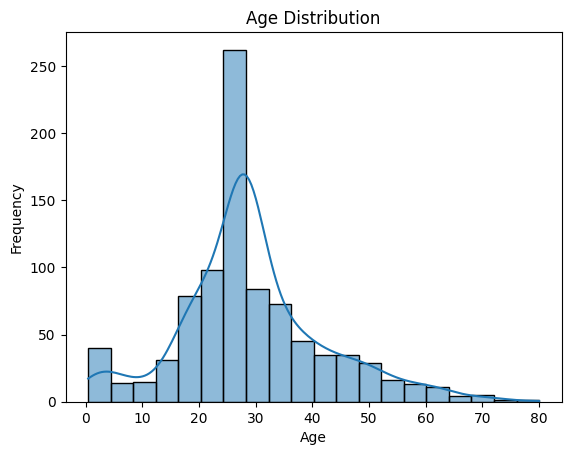

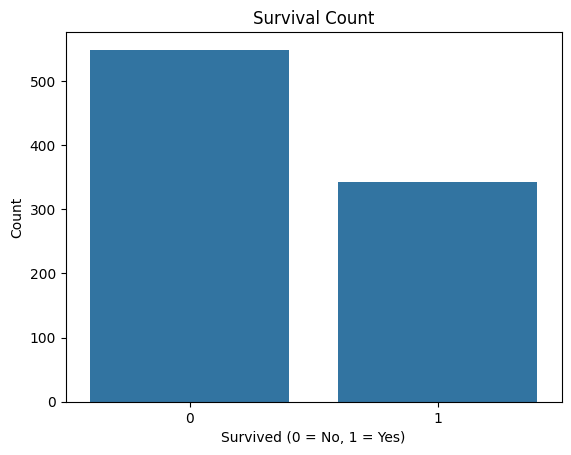

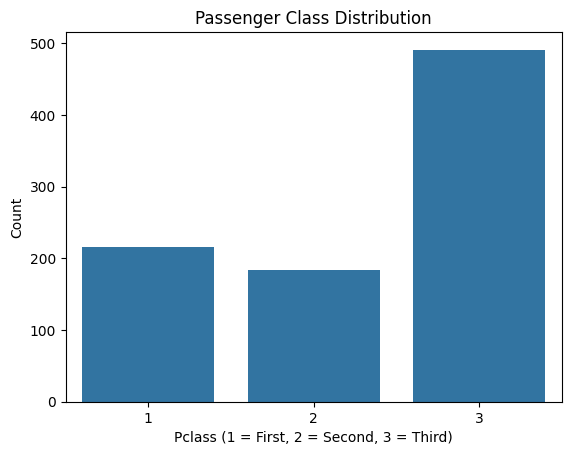

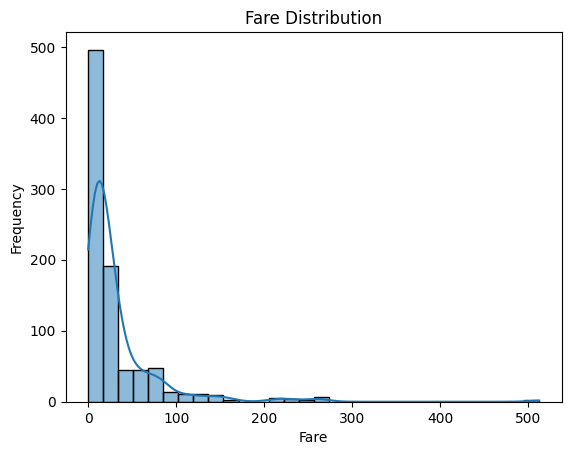

In [ ]:
# Age dist
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival count
sns.countplot(data=data, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Pclass dist
sns.countplot(data=data, x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Count')
plt.show()

# Fare dist
sns.histplot(data=data, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

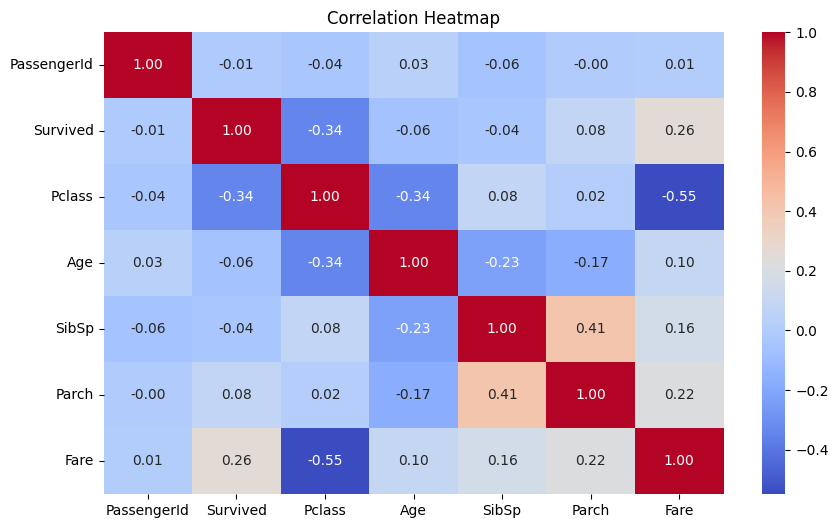

In [ ]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calc. correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize correlation matrix w/ a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

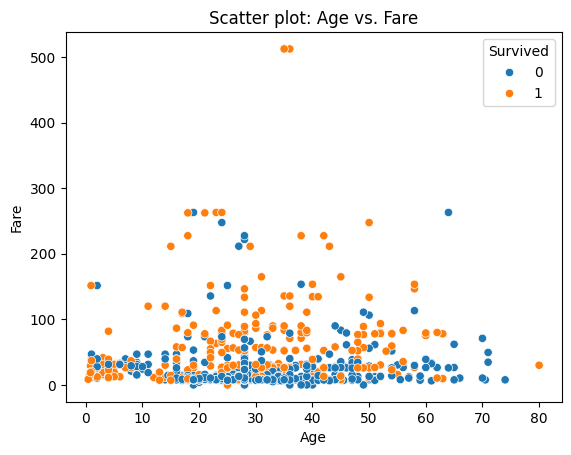

In [ ]:
# Scatter plot between Age and Fare
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Scatter plot: Age vs. Fare')
plt.show()

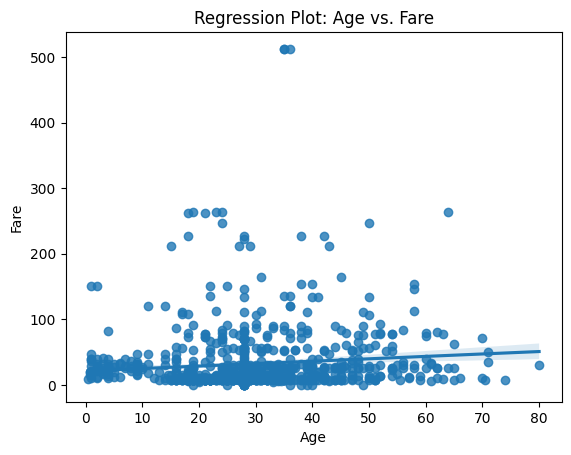

In [ ]:
# Regression plot: Age vs. Fare
sns.regplot(data=data, x='Age', y='Fare')
plt.title('Regression Plot: Age vs. Fare')
plt.show()

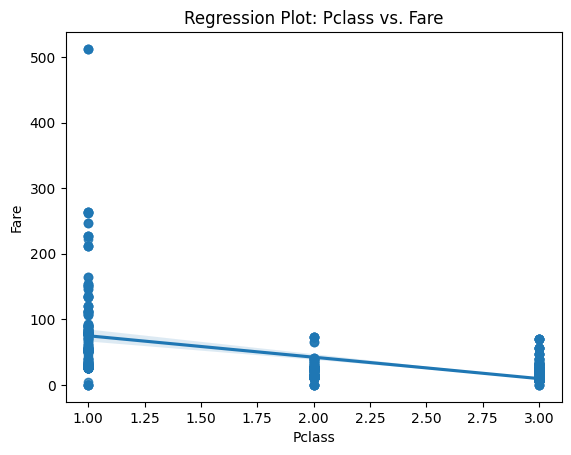

In [ ]:
# Regression plot: Pclass vs. Fare (passenger class vs. fare)
sns.regplot(data=data, x='Pclass', y='Fare')
plt.title('Regression Plot: Pclass vs. Fare')
plt.show()

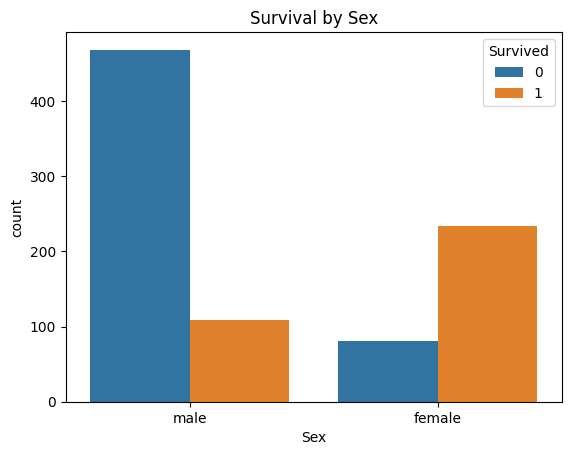

In [ ]:
# Survival by Sex (0=died, 1=survived)
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

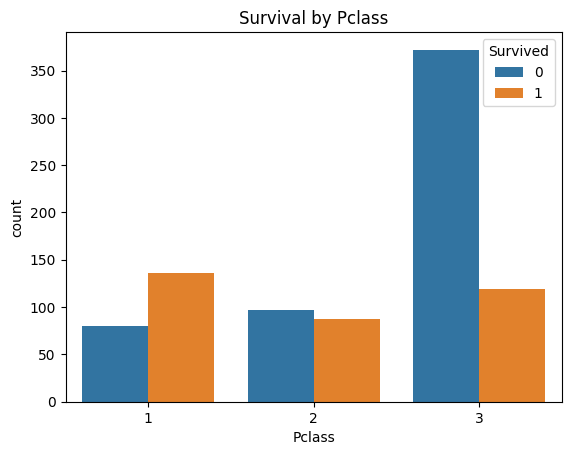

In [ ]:
# Survival by Passenger Class (0=died, 1=survived)
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival by Pclass')
plt.show()

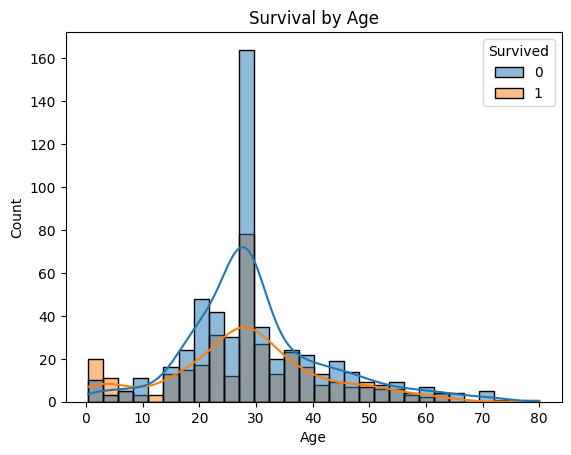

In [ ]:
# Surival by Age (0=died, 1=survived)
sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Survival by Age')
plt.show()

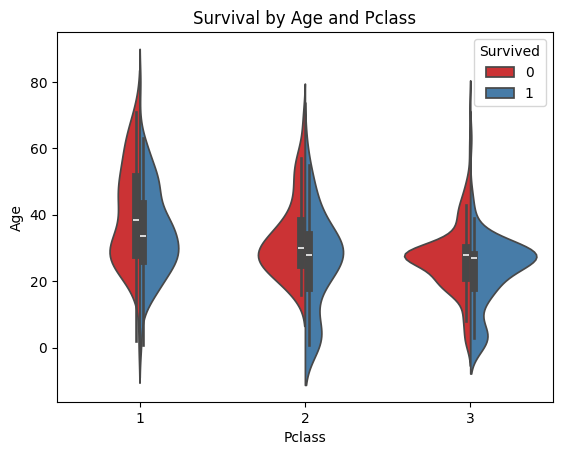

In [ ]:
# Violin plot: Age vs Survival, split by Passenger Class (Pclass)
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, palette='Set1')
plt.title('Survival by Age and Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

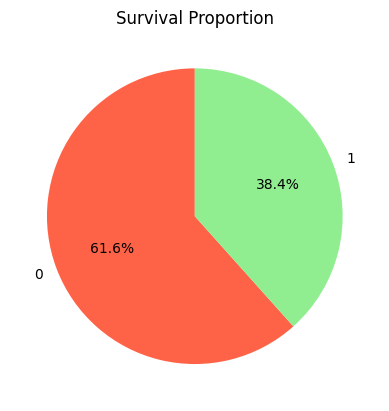

In [ ]:
# Pie chart: Proportion of survivors vs non-survivors
survival_counts = data['Survived'].value_counts()
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#90EE90'])

plt.title('Survival Proportion')
plt.ylabel('')
plt.show()

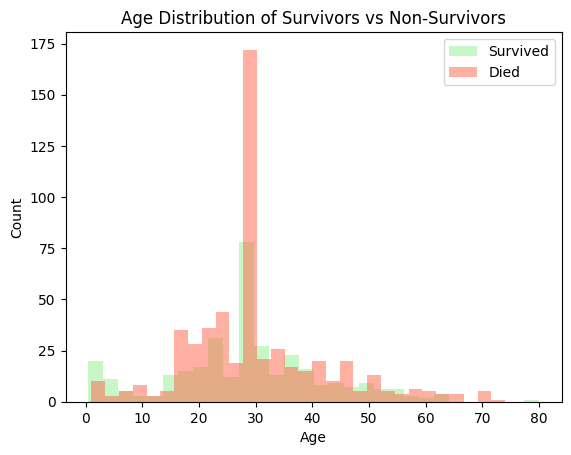

In [ ]:
# Histogram: Age Distribution of Survivors vs Non-Survivors
plt.hist(data[data['Survived'] == 1]['Age'], bins=30, alpha=0.5, label='Survived', color='#90EE90')
plt.hist(data[data['Survived'] == 0]['Age'], bins=30, alpha=0.5, label='Died', color='#FF6347')

plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

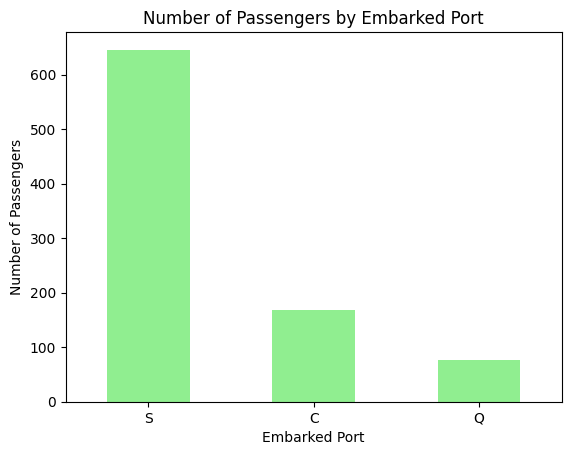

In [ ]:
# Bar plot: Number of Passengers by Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)
embarked_counts = data['Embarked'].value_counts()
embarked_counts.plot(kind='bar', color='#90EE90')

plt.title('Number of Passengers by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-7-45270615ed13>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-45270615ed13>:22: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


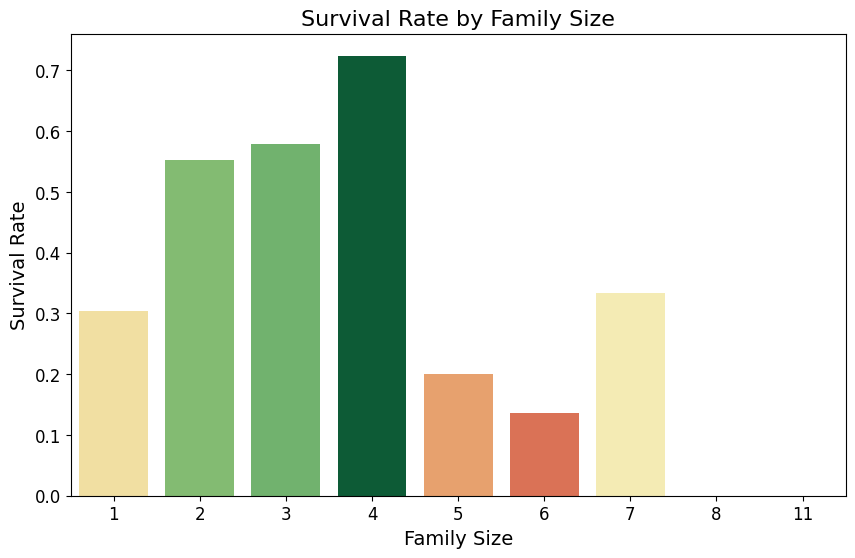

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/CGT370_Miniproj_1/train.csv'

df = pd.read_csv(file_path)

data = pd.read_csv(file_path)

# Create FamilySize column
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Normalize survival rates for color mapping
norm = plt.Normalize(family_survival['Survived'].min(), family_survival['Survived'].max())
colors = plt.cm.RdYlGn(norm(family_survival['Survived']))

plt.figure(figsize=(10, 6))
sns.barplot(
    x='FamilySize',
    y='Survived',
    data=family_survival,
    palette=colors
)
plt.title('Survival Rate by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

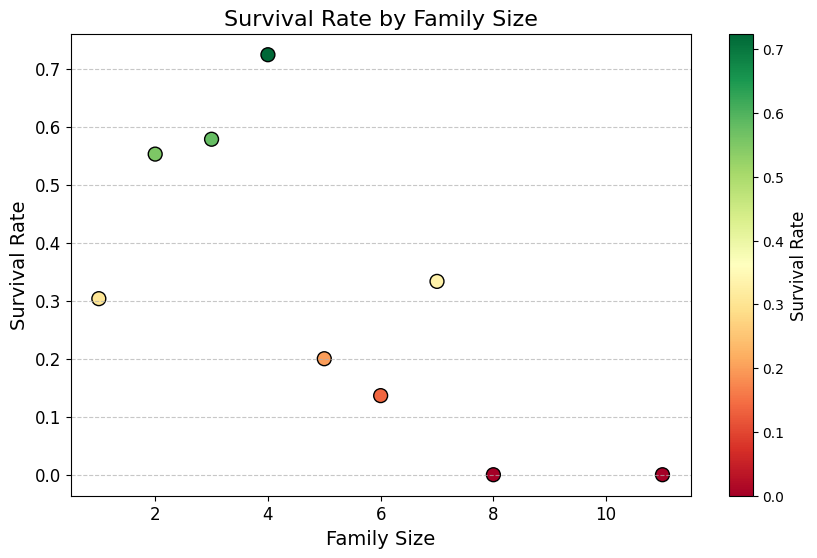

In [12]:
# Create a scatter plot for Survival Rate by Family Size
plt.figure(figsize=(10, 6))

# Normalize survival rates for color mapping
norm = plt.Normalize(family_survival['Survived'].min(), family_survival['Survived'].max())
cmap = plt.cm.RdYlGn  # Define the colormap

# Scatter plot
scatter = plt.scatter(
    family_survival['FamilySize'],
    family_survival['Survived'],
    c=family_survival['Survived'],
    cmap=cmap,
    norm=norm,
    s=100,
    edgecolor='black'
)

cbar = plt.colorbar(scatter)
cbar.set_label('Survival Rate', fontsize=12)

plt.title('Survival Rate by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

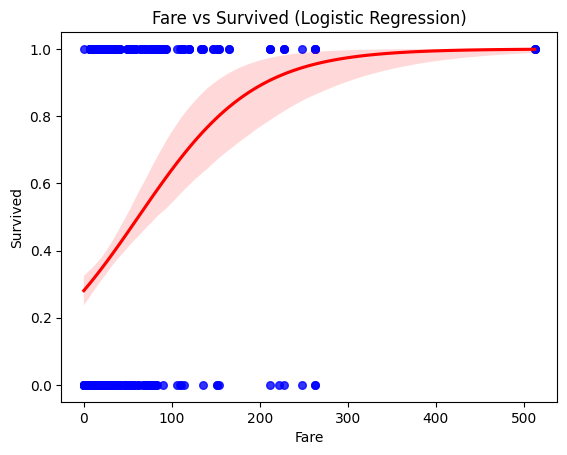

In [11]:
# Create a logistic regression plot of Fare vs. Survived
sns.regplot(x='Fare', y='Survived', data=df, logistic=True, scatter_kws={'s': 30, 'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Fare vs Survived (Logistic Regression)')
plt.xlabel('Fare')
plt.ylabel('Survived')

plt.show()

##Data Interpretation/Insights

###Distributions

Histograms are used to visualize the distributions of 'Age' and 'Fare'.

###Counts

Count plots show the number of survivors and the distribution across passenger classes ('Pclass').

###Correlations

A heatmap displays the correlation between numerical features.

###Relationships

Scatter plots and regression plots visualize relationships between 'Age', 'Fare', and 'Pclass'.  These plots help understand potential connections between these variables and survival.

###Survival by Categories

Count plots examine survival rates based on sex, passenger class, and age.

###Violin Plots

Violin plots illustrate the relationship between age, passenger class, and survival.

###Survival Proportion

A pie chart shows the proportion of survivors to non-survivors.

###Age Distribution by Survival

Histograms compare the age distributions of survivors and non-survivors.

###Embarked Port:

A bar plot shows the number of passengers that embarked at different locations.
